# PheWas and Data Manipulation

Import libraries and map

In [1]:
import pandas as pd
import numpy as np
from phemap import Phemap
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats
import seaborn as sns
import math
from tabulate import tabulate

In [2]:
source_file = 'data/phecode_definitions1.2.csv'
mapping_file = 'data/phecode_map.csv'

In [3]:
def normalise(x):
    return (x - np.mean(x)) / np.std(x)

In [4]:
phemap = Phemap(source_file=source_file, mapping_file=mapping_file)

## Add age and gender

In [5]:
col_list = ["eid",
            "31-0.0",
            "21003-0.0",
            "22420-2.0",
            "22420-3.0",
            "22421-2.0",
            "22421-3.0",
            "22422-2.0",
            "22422-3.0"]

df = pd.read_csv("I:/UKB_DATA/main_df/si_ukb45494.csv", usecols=col_list)
# read eid '31-0.0' '21003-0.0'
df = df.rename(columns={"31-0.0":"sex",
                        "21003-0.0":"age",
                        "eid":"idx",
                        "22420-2.0":"EF1",
                        "22420-3.0":"EF2",
                        "22421-2.0":"LVED1",
                       "22421-3.0":"LVED2",
                       "22422-2.0":"LVES1",
                       "22422-3.0":"LVES2"})

In [6]:
imaging=pd.read_csv("I:/UKB_DATA/tsv_pheno/BSA_width.tsv", sep='\t',index_col=0)
imaging = imaging.loc[:, ~imaging.columns.str.contains('^Unnamed')]
#imaging['hw']=imaging['pheno']

In [7]:
imaging = imaging.merge(df,on='idx')

In [8]:
imaging 

,idx,pheno,sex,age,EF1,EF2,LVED1,LVED2,LVES1,LVES2
0,1000158,22.185700,1.0,44.0,52.0,NaN,130.0,NaN,62.0,NaN
1,1000243,29.643027,1.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1000262,28.551404,0.0,58.0,56.0,NaN,127.0,NaN,56.0,NaN
3,1000369,31.320189,0.0,60.0,60.0,NaN,104.0,NaN,42.0,NaN
4,1000489,28.008336,1.0,66.0,57.0,NaN,115.0,NaN,49.0,NaN
...,...,...,...,...,...,...,...,...,...,...
38892,6024127,29.394924,0.0,44.0,58.0,NaN,136.0,NaN,57.0,NaN
38893,6024225,29.621574,0.0,63.0,62.0,NaN,92.0,NaN,35.0,NaN
38894,6024290,27.659696,1.0,41.0,50.0,NaN,177.0,NaN,89.0,NaN
38895,6024624,27.111761,0.0,44.0,57.0,NaN,128.0,NaN,55.0,NaN


In [9]:
imaging.to_csv("hw_sex_age.csv",index=False)

# PheWas

Read non-imaging phenotypes

In [10]:
with open(r"patient_diag", "rb") as input_file:
    non_imaging = pickle.load(input_file)
len(non_imaging)

502461

In [11]:
non_imaging

{1000012: ['174.11',
  '198.2',
  '198.2',
  '280.1',
  '272.1',
  '495.0',
  '495.0',
  '530.1',
  '530.14',
  '530.11',
  '535.0',
  '555.21',
  '939.0',
  '733.0',
  '756.5',
  '532.0',
  '1019.0',
  '850.0',
  '1015.0',
  '564.9',
  '965.1',
  '175.0'],
 1000029: ['272.11',
  '401.1',
  '411.2',
  '411.4',
  '470.0',
  '473.0',
  '550.1',
  '477.0',
  '512.8',
  '1019.0',
  '197.0'],
 1000031: ['455.0'],
 1000047: ['366.0', '550.4', '418.0'],
 1000050: ['285.0', '714.1', '740.1', '418.0', '418.0', '960.2'],
 1000068: ['174.11',
  '174.11',
  '285.0',
  '250.0',
  '250.2',
  '300.13',
  '362.2',
  '362.29',
  '474.2',
  '497.0',
  '496.0',
  '495.0',
  '521.1',
  '530.11',
  '531.2',
  '531.3',
  '211.0',
  '550.5',
  '550.0',
  '550.2',
  '947.0',
  '785.0',
  '532.0',
  '174.11',
  '306.0',
  '175.0',
  '990.0'],
 1000073: [],
 1000085: ['208.0', '562.1', '562.1', '208.0', '459.9', '564.9'],
 1000094: [],
 1000101: ['208.0', '565.1', '208.0', '704.0', '706.2', '1009.0'],
 1000119:

Read imaging phenotypes

In [12]:
imaging = pd.read_csv("hw_sex_age.csv")
len(imaging)

38897

Filter the patients for imaging and non-imaging

Contract Ids

In [13]:
relevant_ids = np.array(imaging['idx'])
ef1 = np.array([])
ef2 = np.array([])
lved1 = np.array([])
lved2 = np.array([])

Contracted array

## Exclude imaging phenotypes that are abnormal
* LVEF 48 - 70% 
* LVEDV 88 - 218
* LVESV 31 - 97

In [14]:
lv_associated=df

In [15]:
lv_associated['LVED1'] = lv_associated['LVED1'].fillna(90)
lv_associated['LVED2'] = lv_associated['LVED2'].fillna(90)

In [16]:
lv_associated=lv_associated.fillna(60)

In [17]:
lv_associated

,idx,sex,age,EF1,EF2,LVED1,LVED2,LVES1,LVES2
0,1000158,1.0,44.0,52.0,60.0,130.0,90.0,62.0,60.0
1,1000243,1.0,59.0,60.0,60.0,90.0,90.0,60.0,60.0
2,1000262,0.0,58.0,56.0,60.0,127.0,90.0,56.0,60.0
3,1000369,0.0,60.0,60.0,60.0,104.0,90.0,42.0,60.0
4,1000489,1.0,66.0,57.0,60.0,115.0,90.0,49.0,60.0
...,...,...,...,...,...,...,...,...,...
38892,6024127,0.0,44.0,58.0,60.0,136.0,90.0,57.0,60.0
38893,6024225,0.0,63.0,62.0,60.0,92.0,90.0,35.0,60.0
38894,6024290,1.0,41.0,50.0,60.0,177.0,90.0,89.0,60.0
38895,6024624,0.0,44.0,57.0,60.0,128.0,90.0,55.0,60.0


In [18]:
np.array(lv_associated['EF2'])[0]>30

True

In [19]:
exclude = (np.array(lv_associated['EF1'])<48) | \
(np.array(lv_associated['EF1'])>70) | \
(np.array(lv_associated['EF2'])<48) | \
(np.array(lv_associated['EF2'])>70) | \
(np.array(lv_associated['LVED1'])<88) | \
(np.array(lv_associated['LVED1'])>218) | \
(np.array(lv_associated['LVED2'])<88) | \
(np.array(lv_associated['LVED2'])>218) | \
(np.array(lv_associated['LVES1'])<31) | \
(np.array(lv_associated['LVES1'])>93) | \
(np.array(lv_associated['LVES2'])<31) | \
(np.array(lv_associated['LVES2'])>93)

In [20]:
imaging = imaging[~exclude]

### Delete Ids from non_imaging that are  present in imaging

In [21]:
data = list(non_imaging.items())
non_imaging_ids = np.array(data)[:,0]

In [22]:
imaging_ids = np.array(imaging['idx'])

In [23]:
keep_ids = np.intersect1d(imaging_ids,non_imaging_ids)

In [24]:
non_imaging_filtered = { idx: non_imaging[idx] for idx in keep_ids }

In [25]:
non_imaging=non_imaging_filtered

In [26]:
imaging=imaging[imaging['idx'].isin(keep_ids)]

In [27]:
len(imaging)

38895

In [28]:
len(non_imaging_filtered)

38895

Normalize and adjust for confounding factors

In [29]:
imaging

,idx,pheno,sex,age,EF1,EF2,LVED1,LVED2,LVES1,LVES2
0,1000158,22.185700,1.0,44.0,52.0,NaN,130.0,NaN,62.0,NaN
1,1000243,29.643027,1.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1000262,28.551404,0.0,58.0,56.0,NaN,127.0,NaN,56.0,NaN
3,1000369,31.320189,0.0,60.0,60.0,NaN,104.0,NaN,42.0,NaN
4,1000489,28.008336,1.0,66.0,57.0,NaN,115.0,NaN,49.0,NaN
...,...,...,...,...,...,...,...,...,...,...
38892,6024127,29.394924,0.0,44.0,58.0,NaN,136.0,NaN,57.0,NaN
38893,6024225,29.621574,0.0,63.0,62.0,NaN,92.0,NaN,35.0,NaN
38894,6024290,27.659696,1.0,41.0,50.0,NaN,177.0,NaN,89.0,NaN
38895,6024624,27.111761,0.0,44.0,57.0,NaN,128.0,NaN,55.0,NaN


In [30]:
conf = np.stack((imaging['sex'], imaging['age']), axis=1)
conf = (conf - np.mean(conf, axis=0)) / np.std(conf, axis=0)

In [31]:
n_row = conf.shape[1]
n_col = imaging.shape[1]
beta = np.zeros((n_row, n_col))
i=1
x = imaging.iloc[:, i]
beta[:, i] = np.dot(np.linalg.pinv(conf), x)
x = x - np.dot(conf, beta[:, i])
x = normalise(x)
imaging.iloc[:, i] = x

In [32]:
imaging

,idx,pheno,sex,age,EF1,EF2,LVED1,LVED2,LVES1,LVES2
0,1000158,-1.668684,1.0,44.0,52.0,NaN,130.0,NaN,62.0,NaN
1,1000243,1.004798,1.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1000262,0.244974,0.0,58.0,56.0,NaN,127.0,NaN,56.0,NaN
3,1000369,1.267255,0.0,60.0,60.0,NaN,104.0,NaN,42.0,NaN
4,1000489,0.333261,1.0,66.0,57.0,NaN,115.0,NaN,49.0,NaN
...,...,...,...,...,...,...,...,...,...,...
38892,6024127,0.677819,0.0,44.0,58.0,NaN,136.0,NaN,57.0,NaN
38893,6024225,0.604973,0.0,63.0,62.0,NaN,92.0,NaN,35.0,NaN
38894,6024290,0.410194,1.0,41.0,50.0,NaN,177.0,NaN,89.0,NaN
38895,6024624,-0.178868,0.0,44.0,57.0,NaN,128.0,NaN,55.0,NaN


Patients filtered now

In [33]:
all_codes=phemap.get_all_phecodes()

In [34]:
all_phe_codes=[]

In [35]:
for i in range(len(all_codes)):
    all_phe_codes.append(all_codes[i]['phecode'])

In [36]:
PheWasDic = {}
PheWasDic['idx'] = np.array(imaging['idx'])
PheWasDic['pheno'] = np.array(imaging['pheno'])

In [37]:
for phecode in all_phe_codes:
    diagnosed = []
    for patient in non_imaging:
        if (phecode in non_imaging[patient]):
            diagnosed.append(1)
        else:
            diagnosed.append(0)  
    PheWasDic[phecode] = np.array(diagnosed)

In [38]:
PheWasDic

{'idx': array([1000158, 1000243, 1000262, ..., 6024290, 6024624, 6024797],
       dtype=int64),
 'pheno': array([-1.66868436,  1.00479827,  0.24497436, ...,  0.41019359,
        -0.17886779,  1.00318636]),
 '008': array([0, 0, 0, ..., 0, 0, 0]),
 '008.5': array([0, 0, 0, ..., 0, 0, 0]),
 '008.51': array([0, 0, 0, ..., 0, 0, 0]),
 '008.52': array([0, 0, 0, ..., 0, 0, 0]),
 '008.6': array([0, 0, 0, ..., 0, 0, 0]),
 '008.7': array([0, 0, 0, ..., 0, 0, 0]),
 '010': array([0, 0, 0, ..., 0, 0, 0]),
 '031': array([0, 0, 0, ..., 0, 0, 0]),
 '031.1': array([0, 0, 0, ..., 0, 0, 0]),
 '038': array([0, 0, 0, ..., 0, 0, 0]),
 '038.1': array([0, 0, 0, ..., 0, 0, 0]),
 '038.2': array([0, 0, 0, ..., 0, 0, 0]),
 '038.3': array([0, 0, 0, ..., 0, 0, 0]),
 '041': array([0, 0, 0, ..., 0, 0, 0]),
 '041.1': array([0, 0, 0, ..., 0, 0, 0]),
 '041.11': array([0, 0, 0, ..., 0, 0, 0]),
 '041.12': array([0, 0, 0, ..., 0, 0, 0]),
 '041.2': array([0, 0, 0, ..., 0, 0, 0]),
 '041.21': array([0, 0, 0, ..., 0, 0, 0]),
 

In [39]:
dfp =pd.DataFrame.from_dict(PheWasDic)

In [40]:
dfp.to_csv("phewas.csv")

In [41]:
dfp

,idx,pheno,008,008.5,008.51,008.52,008.6,008.7,010,031,...,986,987,988,989,990,994,994.1,994.2,994.21,996
0,1000158,-1.668684,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000243,1.004798,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000262,0.244974,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000369,1.267255,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000489,0.333261,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38890,6024127,0.677819,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38891,6024225,0.604973,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38892,6024290,0.410194,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38893,6024624,-0.178868,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Table structure:
eid___hw___phenocode1___phenocode2.....
eid, float,

## Perform PheWas

In [42]:
phe_table = pd.read_csv("phewas.csv")

In [43]:
phe_table

,Unnamed: 0,idx,pheno,008,008.5,008.51,008.52,008.6,008.7,010,...,986,987,988,989,990,994,994.1,994.2,994.21,996
0,0,1000158,-1.668684,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1000243,1.004798,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1000262,0.244974,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1000369,1.267255,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1000489,0.333261,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38890,38890,6024127,0.677819,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38891,38891,6024225,0.604973,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38892,38892,6024290,0.410194,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38893,38893,6024624,-0.178868,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Additional quant traits are:
* systolic_pressure
* diastolic_pressure
* pulse_rate

In [44]:
quant_traits=pd.read_csv("quant_traits.csv")

In [45]:
quant_traits

,idx,systolic_pressure,diastolic_pressure,pulse_rate
0,1000012,138.0,68.0,72.0
1,1000158,153.0,95.0,68.0
2,1000262,130.0,73.0,71.0
3,1000369,141.0,83.0,80.0
4,1000489,145.0,89.0,66.0
...,...,...,...,...
31711,6024290,132.0,85.0,62.0
31712,6024323,122.0,65.0,75.0
31713,6024624,NaN,NaN,NaN
31714,6024638,136.0,94.0,69.0


In [46]:
phe_table = pd.merge(phe_table,quant_traits, on ='idx')

In [47]:
phe_table
#    temp = phe_table[['pheno', phecode]].dropna()

,Unnamed: 0,idx,pheno,008,008.5,008.51,008.52,008.6,008.7,010,...,989,990,994,994.1,994.2,994.21,996,systolic_pressure,diastolic_pressure,pulse_rate
0,0,1000158,-1.668684,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,153.0,95.0,68.0
1,2,1000262,0.244974,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,130.0,73.0,71.0
2,3,1000369,1.267255,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,141.0,83.0,80.0
3,4,1000489,0.333261,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,145.0,89.0,66.0
4,6,1000542,-2.547127,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26936,38890,6024127,0.677819,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,134.0,96.0,85.0
26937,38891,6024225,0.604973,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,119.0,70.0,62.0
26938,38892,6024290,0.410194,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,132.0,85.0,62.0
26939,38893,6024624,-0.178868,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


Normalize

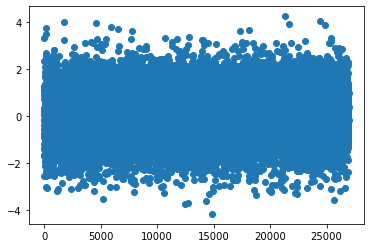

In [48]:
plt.scatter(np.arange(len(phe_table['pheno'])),phe_table['pheno'])

# PERFORM THE ASSOCIATION

In [49]:
results = {}

In [50]:
results['phecode'] = np.array(phe_table.columns[3:])

In [51]:
ccs = []
p_vals = []
for phecode in phe_table.columns[3:]:
    temp = phe_table[['pheno', phecode]].dropna()
    cc, p_val = scipy.stats.pearsonr(temp['pheno'], temp[phecode])
    ccs.append(cc)
    p_vals.append(p_val)
    
results['ccs']=ccs
results['p_vals']=p_vals

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [52]:
results = pd.DataFrame.from_dict(results)

Drop Nans

In [53]:
results = results.dropna()

In [54]:
results

,phecode,ccs,p_vals
64,110.1,-0.006990,2.512691e-01
65,110.11,0.001460,8.106072e-01
66,110.12,-0.005077,4.046594e-01
67,110.13,-0.001027,8.662029e-01
71,112.3,-0.005494,3.671768e-01
...,...,...,...
1843,972.2,-0.001164,8.484265e-01
1863,994.2,-0.004788,4.319706e-01
1866,systolic_pressure,-0.017011,7.072690e-03
1867,diastolic_pressure,-0.129240,8.006865e-94


In [55]:
log_corr_p = - np.log10(results['p_vals'])

In [56]:
log_corr_p

64        0.599861
65        0.091190
66        0.392910
67        0.062380
71        0.435125
           ...    
1843      0.071386
1863      0.364546
1866      2.150415
1867     93.096537
1868    240.201566
Name: p_vals, Length: 949, dtype: float64

In [57]:
results['log_cor']=log_corr_p

In [58]:
results.to_csv("hw_phewas_results.csv",index=False)

# ANalyize and Plot


Bonferroni correction

In [59]:
results=pd.read_csv("hw_phewas_results.csv")

In [60]:
len(results)

949

In [61]:
p_bonf = 0.05 / len(phemap.get_all_phecodes())

In [62]:
p_bonf

2.679528403001072e-05

In [63]:
print('Number of correlations reaching Bonferroni threshold = {0}'.format(np.sum(results['p_vals'] < p_bonf)))

Number of correlations reaching Bonferroni threshold = 20


In [64]:
relevant = np.array(results[results['p_vals']<p_bonf])

In [65]:
relevant

array([['250.2', -0.08359734823299264, 5.468170398134267e-43,
        42.26215796048745],
       ['272.11', -0.034989337373478736, 9.217009102160209e-09,
        8.035409983626947],
       ['274.1', -0.034041983626873364, 2.2849375297842826e-08,
        7.641125669047452],
       ['278.1', -0.11662011934428446, 3.273818147008187e-82,
        81.48494544830353],
       ['296.2', -0.036418220764457866, 2.2411432776099933e-09,
        8.649530377875324],
       ['327.3', -0.06304090485884414, 3.8825670201619934e-25,
        24.41088103882276],
       ['401.1', -0.0561460691348525, 2.9024597329782616e-20,
        19.537233796694178],
       ['509.8', -0.02937821564898262, 1.4150479866687812e-06,
        5.8492288322300885],
       ['530.11', -0.027785113727185867, 5.0852907942899975e-06,
        5.293684207589892],
       ['550.2', -0.028748727588925767, 2.3643630941698885e-06,
        5.626285828262186],
       ['571.5', -0.04928171407581065, 5.797342700580058e-16,
        15.236771026251

In [66]:
table = []
table.append(["PheCode", "CorCoef", "P_VAL"])
for p in relevant:
    try:
        table.append([phemap.get_phecode_info(p[0])['phenotype'], p[1] ,p[2]])
    except:
        table.append([p[0], p[1] ,p[2]])


In [67]:
print(tabulate(table))

------------------------------------------------------------  ---------------------  ----------------------
PheCode                                                       CorCoef                P_VAL
Type 2 diabetes                                               -0.08359734823299264   5.468170398134267e-43
Hypercholesterolemia                                          -0.034989337373478736  9.217009102160209e-09
Gout                                                          -0.034041983626873364  2.2849375297842826e-08
Obesity                                                       -0.11662011934428446   3.273818147008187e-82
Depression                                                    -0.036418220764457866  2.2411432776099933e-09
Sleep apnea                                                   -0.06304090485884414   3.8825670201619934e-25
Essential hypertension                                        -0.0561460691348525    2.9024597329782616e-20
Dependence on respirator [Ventilator] or supplem

In [68]:
categories = []
for i in range(len(results)):
    try:
        categories.append(phemap.get_phecode_info(results['phecode'][i])['category'])
    except:
        categories.append("quant measurements")

In [69]:
results['categories']=categories
results.to_csv("hw_phewas_results.csv",index=False)

In [70]:
len(np.unique(results['categories']))

18

In [71]:
pal = ['green', 'blue', 
       'purple', 'orange', 
       'pink', 'blue',
      'blue','red',
      'brown', 'green',
      'black', 'yellow',
      'purple', 'gray',
       'gold','blue','green','red','purple', 'orange', 
       'pink', 'blue',
      'blue','red']

In [72]:
results

,phecode,ccs,p_vals,log_cor,categories
0,110.1,-0.006990,2.512691e-01,0.599861,infectious diseases
1,110.11,0.001460,8.106072e-01,0.091190,infectious diseases
2,110.12,-0.005077,4.046594e-01,0.392910,infectious diseases
3,110.13,-0.001027,8.662029e-01,0.062380,infectious diseases
4,112.3,-0.005494,3.671768e-01,0.435125,infectious diseases
...,...,...,...,...,...
944,972.2,-0.001164,8.484265e-01,0.071386,injuries & poisonings
945,994.2,-0.004788,4.319706e-01,0.364546,injuries & poisonings
946,systolic_pressure,-0.017011,7.072690e-03,2.150415,quant measurements
947,diastolic_pressure,-0.129240,8.006865e-94,93.096537,quant measurements


In [73]:
results.at[len(results)-3,'phecode']="1000.1"
results.at[len(results)-2,'phecode']="1001.1"
results.at[len(results)-1,'phecode']="1002.1"
# adding one more string row so that R read it as string
onemore = {'phecode': 'one more', 'ccs': '0.01', 'p_vals':"0.1", 'log_cor': '0.1','categories':'quant measurement'}
results = results.append(onemore, ignore_index = True)

In [74]:
results

,phecode,ccs,p_vals,log_cor,categories
0,110.1,-0.00698996,0.251269,0.599861,infectious diseases
1,110.11,0.00146008,0.810607,0.0911895,infectious diseases
2,110.12,-0.00507723,0.404659,0.39291,infectious diseases
3,110.13,-0.00102653,0.866203,0.0623804,infectious diseases
4,112.3,-0.00549424,0.367177,0.435125,infectious diseases
...,...,...,...,...,...
945,994.2,-0.0047878,0.431971,0.364546,injuries & poisonings
946,1000.1,-0.0170107,0.00707269,2.15042,quant measurements
947,1001.1,-0.12924,8.00687e-94,93.0965,quant measurements
948,1002.1,-0.207087,6.28686e-241,240.202,quant measurements


In [75]:
results.to_csv("results.csv",index=False)

In [76]:
markers=["^","v"]
positive_cor = results[results['ccs']>0]
negative_cor = results[results['ccs']<0]
pal2=pal[:len(np.unique(negative_cor['categories']))]
pal1=pal[:len(np.unique(positive_cor['categories']))]
significant = results[results['p_vals']<p_bonf]
sns.scatterplot(x=positive_cor['phecode'].index, y=positive_cor['log_cor'], size=np.abs(positive_cor['ccs']),
                     hue=positive_cor['categories'],sizes=(30, 80), 
                     alpha=0.8, palette=pal1, marker="^", ec="face")
sns.scatterplot(x=negative_cor['phecode'].index, y=negative_cor['log_cor'], size=np.abs(negative_cor['ccs']), hue=negative_cor['categories'],
                     sizes=(30, 80), 
                     alpha=0.8, palette=pal2, marker="v", ec="face")

plt.plot([0, 1000], [-math.log10(p_bonf), -math.log10(p_bonf)], 'k--', linewidth=1, alpha=0.8)
for index, sig in significant.iterrows():
    try:
        name= phemap.get_phecode_info(sig['phecode'])['phenotype']
    except:
        name = sig['phecode']
        
    plt.text(x= index,
             y= sig['log_cor'],
             s = name,
             fontdict=dict(color='black',size=4)) 
    
plt.ylabel('-log_10(p)')
plt.legend([])
plt.grid()
plt.savefig("foo2.png",dpi=200)

TypeError: '>' not supported between instances of 'str' and 'int'

In [ ]:
p_bonf

In [ ]:
np.unique(results['categories'])

# Get EF LVED and LVES

22420-2.0 and 22420-3.0 Ejection Fraction <br>
22421	LV end diastolic volume <br>
22422   Left ventricular size and function  


In [ ]:
isIn = []
for idx in np.array(df['eid']):
    isIn.append(idx in np.array(imaging['idx']))

In [ ]:
df=df[isIn]

In [ ]:
df.to_csv("main_df_relevant_ids.csv",index=False)

In [ ]:
df['22420-2.0']

In [ ]:
df = pd.read_csv("main_df_relevant_ids.csv")

In [ ]:
new_dic = {
"idx" : np.array(df['eid']),
"EF1" : np.array(df['22420-2.0']),
"EF2" : np.array(df['22420-3.0']),
"LVED1": np.array(df['22421-2.0']),
"LVED2": np.array(df['22421-3.0']),
"LVES1": np.array(df['22422-2.0']),
"LVES2": np.array(df['22422-3.0'])
}

In [ ]:
pd.DataFrame.from_dict(new_dic).to_csv("main_df_relevant_ids.csv",index=False)

## Plot hw differences

In [ ]:
import pandas as pd
from utils import exclude_abnormal
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("I:/UKB_DATA/main_df/ukb47615.csv",sep='\t')

1. Identify phecode 
    * Cardiomyopathy 
    [425.0, 425.1, 425.11, 425.12, 425.2,425.8]
 
    * Atrial fibrillation
    [427.2, 427.21, 427.22]
    * Heart failures [427.4,
 427.42,]
    
    * Type 2 Diabetes 
   [250.2,
 250.21,
 250.22,
 250.23,
 250.24,
 250.25]
    * Hypertension 
[401.0, 401.1, 401.2, 401.21, 401.22, 401.3]

    * Chronic kidney disease 
[585.0,
 585.1,
 585.2,
 585.3,
 585.31,
 585.32,
 585.33,
 585.34,
 585.4]
    * Aortic valve disease	394‑399.99
[394.0,
 394.1,
 394.2,
 394.3,
 394.4,
 394.7,
 395.0,
 395.1,
 395.2,
 395.3,
 395.4,
 395.6]
    * Carditis [420.0, 420.1, 420.2, 420.21, 420.22, 420.3]
    * AV Node Distal Con disease
 [426.0, 426.2,426.21,426.22,426.23,426.24]
2. divide ids in the group and compute mean and std for all


In [ ]:
cariomyopathy = [425, 425.1, 425.11, 425.12, 425.2,425.8]
atrial_fib = [427.2, 427.21, 427.22]
heart_failures = [427.4, 427.42]
diabetes =  [250.2, 250.21, 250.22, 250.23, 250.24, 250.25]
hypertension = [250.2, 250.21, 250.22, 250.23, 250.24, 250.25]
chronic_kidney_disease = [585, 585.1, 585.2, 585.3, 585.31, 585.32, 585.33, 585.34, 585.4]
aortic_valve_disease = [394, 394.1, 394.2, 394.3, 394.4, 394.7, 395, 395.1, 395.2, 395.3, 395.4, 395.6]
carditis = [420, 420.1, 420.2, 420.21, 420.22, 420.3]
av_node = [426, 426.2,426.21,426.22,426.23,426.24]

In [ ]:
def get_ids(phe_codes):
    
    phe_table=pd.read_csv("phewas.csv")
    ids = phe_table[str(phe_codes[0])]
    for code in phe_codes:
        ids |= phe_table[str(code)]
    return np.array(ids)==1

In [ ]:
def get_pheno(ids):
    df=pd.read_csv("I:/UKB_DATA/tsv_pheno/sphericity_index.tsv", sep='\t',index_col=0)
    df=df[~(df['idx']==1273917)]
    df=df[~(df['idx']==1638397)]
#    df=df[~(df['idx']==1273917)]
    return np.array(df[ids]['pheno'])

In [ ]:
cariomyopathy_ids=get_ids(cariomyopathy)
artrial_fib_ids=get_ids(atrial_fib)
heart_failures_ids=get_ids(heart_failures)
diabetes_ids=get_ids(diabetes)
hypertension_ids=get_ids(hypertension)
chronic_kidney_disease_ids=get_ids(chronic_kidney_disease)
aortic_valve_disease_ids = get_ids(aortic_valve_disease)
carditis_ids=get_ids(carditis)
av_node_ids=get_ids(av_node)

In [ ]:
len(cariomyopathy_ids)

In [ ]:
normal= cariomyopathy_ids | artrial_fib_ids | heart_failures_ids | diabetes_ids | hypertension_ids | chronic_kidney_disease_ids | aortic_valve_disease_ids | carditis_ids | av_node_ids
normal = ~ normal

In [ ]:
np.array(cariomyopathy_ids)==1

In [ ]:
cardiomyopathy_hw=get_pheno(cariomyopathy_ids)
artrial_fib_hw=get_pheno(artrial_fib_ids)
heart_failures_hw= get_pheno(heart_failures_ids)
diabetes_hw = get_pheno(diabetes_ids)
hypertension_hw = get_pheno(hypertension_ids)
chronic_kidney_disease_hw = get_pheno(chronic_kidney_disease_ids)
aortic_valve_disease_hw = get_pheno(aortic_valve_disease_ids)
carditis_hw = get_pheno(carditis_ids)
av_node_hw = get_pheno(av_node_ids)
normal_hw = get_pheno(normal)

In [ ]:
data = [normal_hw, cardiomyopathy_hw, heart_failures_hw, artrial_fib_hw, av_node_hw, diabetes_hw, hypertension_hw, chronic_kidney_disease_hw, aortic_valve_disease_hw,carditis_hw,]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
plt.ylabel("Sphericity Index")
# Creating plot
bp = ax.boxplot(data,showfliers=False,patch_artist=True,meanline=True)
t11 = ['00', f'Reference n={len(normal_hw)}', f'Cardiomyopathy n={len(cardiomyopathy_hw)}',
       f'Heart Failure n={len(heart_failures_hw)}', f'Atrial Fibrilation n={len(artrial_fib_hw)}',
       f'AV node n={len(av_node_hw)}',  f'Type 2 Diabetes n={len(diabetes_hw)}', f'Hypertension n={len(hypertension_hw)}',
       f'Kidney Disease n={len(chronic_kidney_disease_hw)}',f'Aortic Valve n={len(aortic_valve_disease_hw)}',f'Carditis n={len(carditis_hw)}']

ax.yaxis.grid(True)
colors = ['pink', 'lightblue', 'lightgreen', 'lightslategray', 'lightyellow', 'azure','lightcyan','peachpuff','thistle','lavender']
plt.xticks(range(len(t11)), t11, size='small',rotation='vertical')
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
#plt.title("Differences in HW pheno")
plt.savefig("diffplot")

## Correlation between quant vars